# 📊 Análise de Vendas com Python

Este notebook realiza uma análise exploratória de um conjunto de dados de vendas, incluindo limpeza de dados, análise de vendas por mês, produtos mais vendidos e regiões com maior volume de vendas.

In [3]:
# 📥 Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo dos gráficos
sns.set(style='whitegrid')

In [5]:
# 📂 Leitura do arquivo CSV
df = pd.read_csv('vendas.csv')
df.head()

,order_id,product,quantity,price,total,date,region
0,1001,Almond Milk,4,27.96,111.84,2025-06-13,Southeast
1,1002,Almond Milk,3,19.58,58.74,2025-03-16,South
2,1003,Whey Protein,2,12.05,24.10,2025-05-28,North
3,1004,Whey Protein,3,29.68,89.04,2025-06-22,Central-West
4,1005,Whey Protein,2,12.75,25.50,2025-03-23,North


In [6]:
# 🔍 Verificando informações iniciais
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  50 non-null     int64  
 1   product   50 non-null     object 
 2   quantity  50 non-null     int64  
 3   price     50 non-null     float64
 4   total     50 non-null     float64
 5   date      50 non-null     object 
 6   region    50 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB


,order_id,quantity,price,total
count,50.00000,50.000000,50.000000,50.000000
mean,1025.50000,2.880000,16.656200,47.316600
std,14.57738,1.451811,7.314983,32.132004
min,1001.00000,1.000000,5.670000,5.670000
25%,1013.25000,2.000000,9.767500,23.867500
50%,1025.50000,3.000000,17.065000,40.915000
75%,1037.75000,4.000000,22.552500,60.990000
max,1050.00000,5.000000,29.680000,139.700000


In [7]:
# 🧹 Tratamento de dados
# Verificando valores ausentes
df.isnull().sum()

,0
order_id,0
product,0
quantity,0
price,0
total,0
date,0
region,0


In [8]:
# Remover duplicatas, se existirem
df = df.drop_duplicates()


In [9]:
# Converter coluna de data
df['date'] = pd.to_datetime(df['date'])

In [10]:
# Criar coluna de mês
df['month'] = df['date'].dt.to_period('M')

## 📈 Vendas por mês

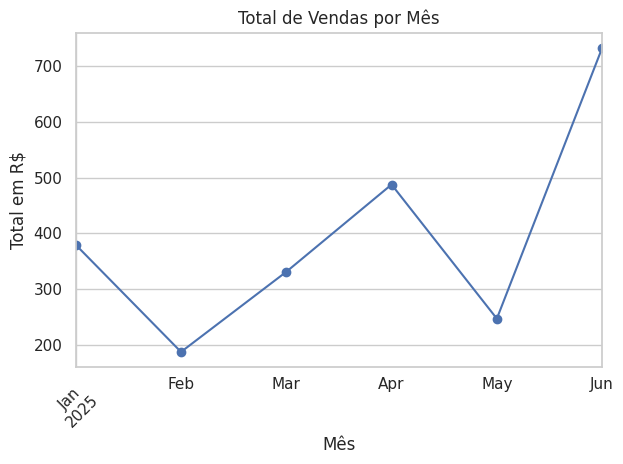

In [11]:
vendas_mes = df.groupby('month')['total'].sum()
vendas_mes.plot(kind='line', title='Total de Vendas por Mês', marker='o')
plt.ylabel('Total em R$')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# prompt: mostre o mes com maior volume de venda

# Identificar o mês com maior volume de vendas
mes_maior_venda = vendas_mes.idxmax()
volume_maior_venda = vendas_mes.max()
print(f'O mês com maior volume de vendas foi {mes_maior_venda} com um total de R${volume_maior_venda:.2f}')

O mês com maior volume de vendas foi 2025-06 com um total de R$732.37


## 🛍️ Produtos mais vendidos

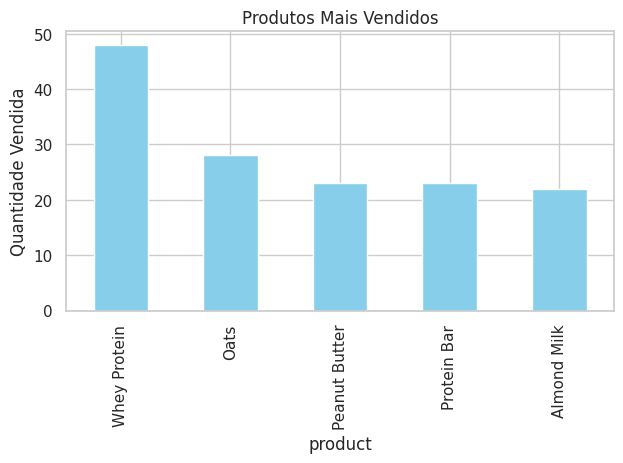

In [12]:
produtos = df.groupby('product')['quantity'].sum().sort_values(ascending=False)
produtos.plot(kind='bar', title='Produtos Mais Vendidos', color='skyblue')
plt.ylabel('Quantidade Vendida')
plt.tight_layout()
plt.show()

In [15]:
# prompt: qual a quantidade exata vendida do produto mais vendido

produto_mais_vendido = produtos.index[0]
quantidade_produto_mais_vendido = produtos.iloc[0]

print(f"O produto mais vendido é '{produto_mais_vendido}' com uma quantidade vendida de {quantidade_produto_mais_vendido}.")

O produto mais vendido é 'Whey Protein' com uma quantidade vendida de 48.


## 🌍 Vendas por região

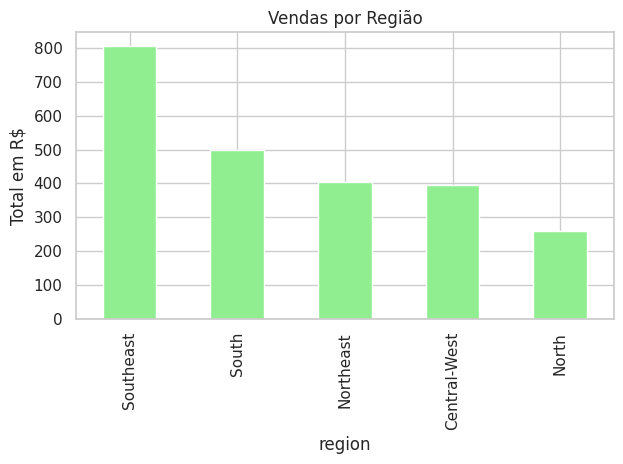

In [13]:
regioes = df.groupby('region')['total'].sum().sort_values(ascending=False)
regioes.plot(kind='bar', title='Vendas por Região', color='lightgreen')
plt.ylabel('Total em R$')
plt.tight_layout()
plt.show()

In [16]:
# prompt: qual valor feito pela regiao com maior faturamento

# Identificar a região com maior faturamento
regiao_maior_faturamento = regioes.index[0]
valor_maior_faturamento = regioes.iloc[0]

print(f"A região com maior faturamento é '{regiao_maior_faturamento}' com um total de R${valor_maior_faturamento:.2f}")

A região com maior faturamento é 'Southeast' com um total de R$806.10


## 📌 Conclusões

- O produto mais vendido foi: Whey Protein, 48 vendas

- A região com maior faturamento foi: Southeast, R$806.10

- O mês com maior volume de vendas foi: Junho, R$732.37